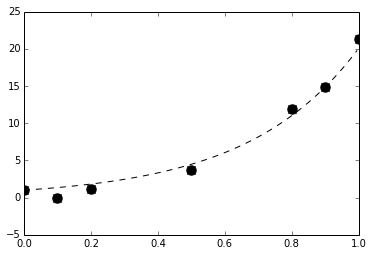

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

f=lambda x: np.exp(3*x)

x_tr = np.linspace(0.,2,200)
y_tr = f(x_tr)
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))

plt.plot(x_tr[:100],y_tr[:100],'--k')
plt.plot(x,y,'ok',ms=10)

###Variables



 f - f is the generative function we are using in this example to generate the points, the function the 'machine' will attempt to guess

 x_tr and y_tr are for drawing the line above, display the f lambda function

 x is an array containing the points below to be plotted by our program.  these are the points our program will use to guess the function

 y is the output of the f function with a little noise added in

As the above plot creates a Linear Regression for an exponential curve, the fit is not the best. Instead, let's create a nonlinear model for this exponential curve using a Linear Regression and a VanderMonde matrix, using NumPy's np.vander function.  

28.84  -9.48  0.00  
54.51  -97.77  55.68  13.42  -5.51  0.00  


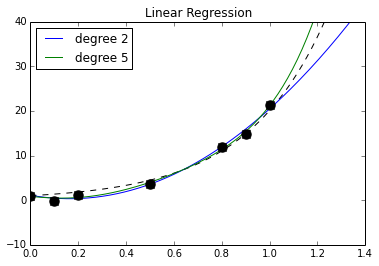

In [5]:
lrp = lm.LinearRegression()
plt.plot(x_tr,y_tr,'--k')
for deg in [2,5]:
    lrp.fit(np.vander(x,deg+1),y)
    y_lrp = lrp.predict(np.vander(x_tr,deg+1))
    plt.plot(x_tr,y_lrp,label='degree '+str(deg))
    plt.legend(loc=2)
    plt.xlim(0,1.4)
    plt.ylim(-10,40)
    print(''.join(['%.2f  '   %   c for c in lrp.coef_]))
plt.plot(x,y,'ok', ms=10)
plt.title("Linear Regression")

Note the large exponents for the degree 5 polynomial above (54.51, -97.77 , etc).  This is generally a sign of overfitting.  We can use a Ridge Regression model sometimes to fit this model that will prevent polynomials from getting too large. 

13.26   5.54   0.00  
4.12   4.28   4.42   4.39   3.25   0.00  


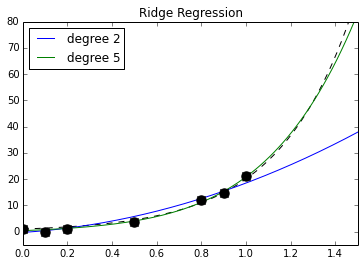

In [8]:
ridge = lm.RidgeCV()
plt.plot(x_tr,y_tr,'--k')
for deg in [2,5]:
    ridge.fit(np.vander(x,deg+1),y)
    y_ridge = ridge.predict(np.vander(x_tr,deg+1))
    plt.plot(x_tr,y_ridge,label="degree "+str(deg))
    plt.legend(loc=2)
    plt.xlim(0,1.5)
    plt.ylim(-5,80)
    print(' '.join(['%.2f  '  %  c for c in ridge.coef_]))
plt.plot(x,y,'ok',ms=10)
plt.title('Ridge Regression')